In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load your dataset
df = pd.read_csv('diabetes_data_upload.csv')

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Convert categorical variables to numerical
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Separate features and target
X = df.drop('class', axis=1)
y = df['class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Colors
colors = sns.color_palette("viridis", n_colors=len(X_train.columns))

df.head()

Missing values:
 Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
y_train.value_counts()

,count
class,
1,249
0,167


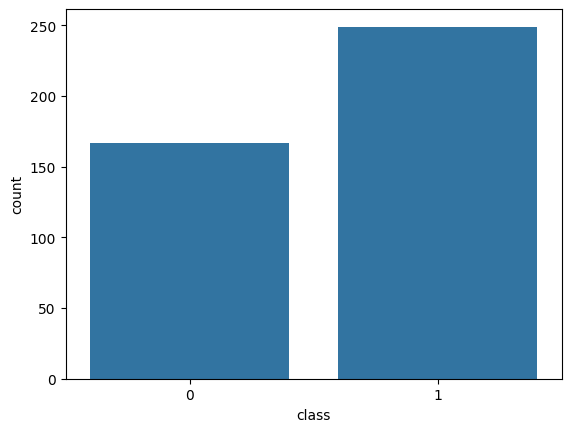

In [ ]:
sns.countplot(x=y_train);

Text(0.5, 1.0, 'Correlation Heatmap')

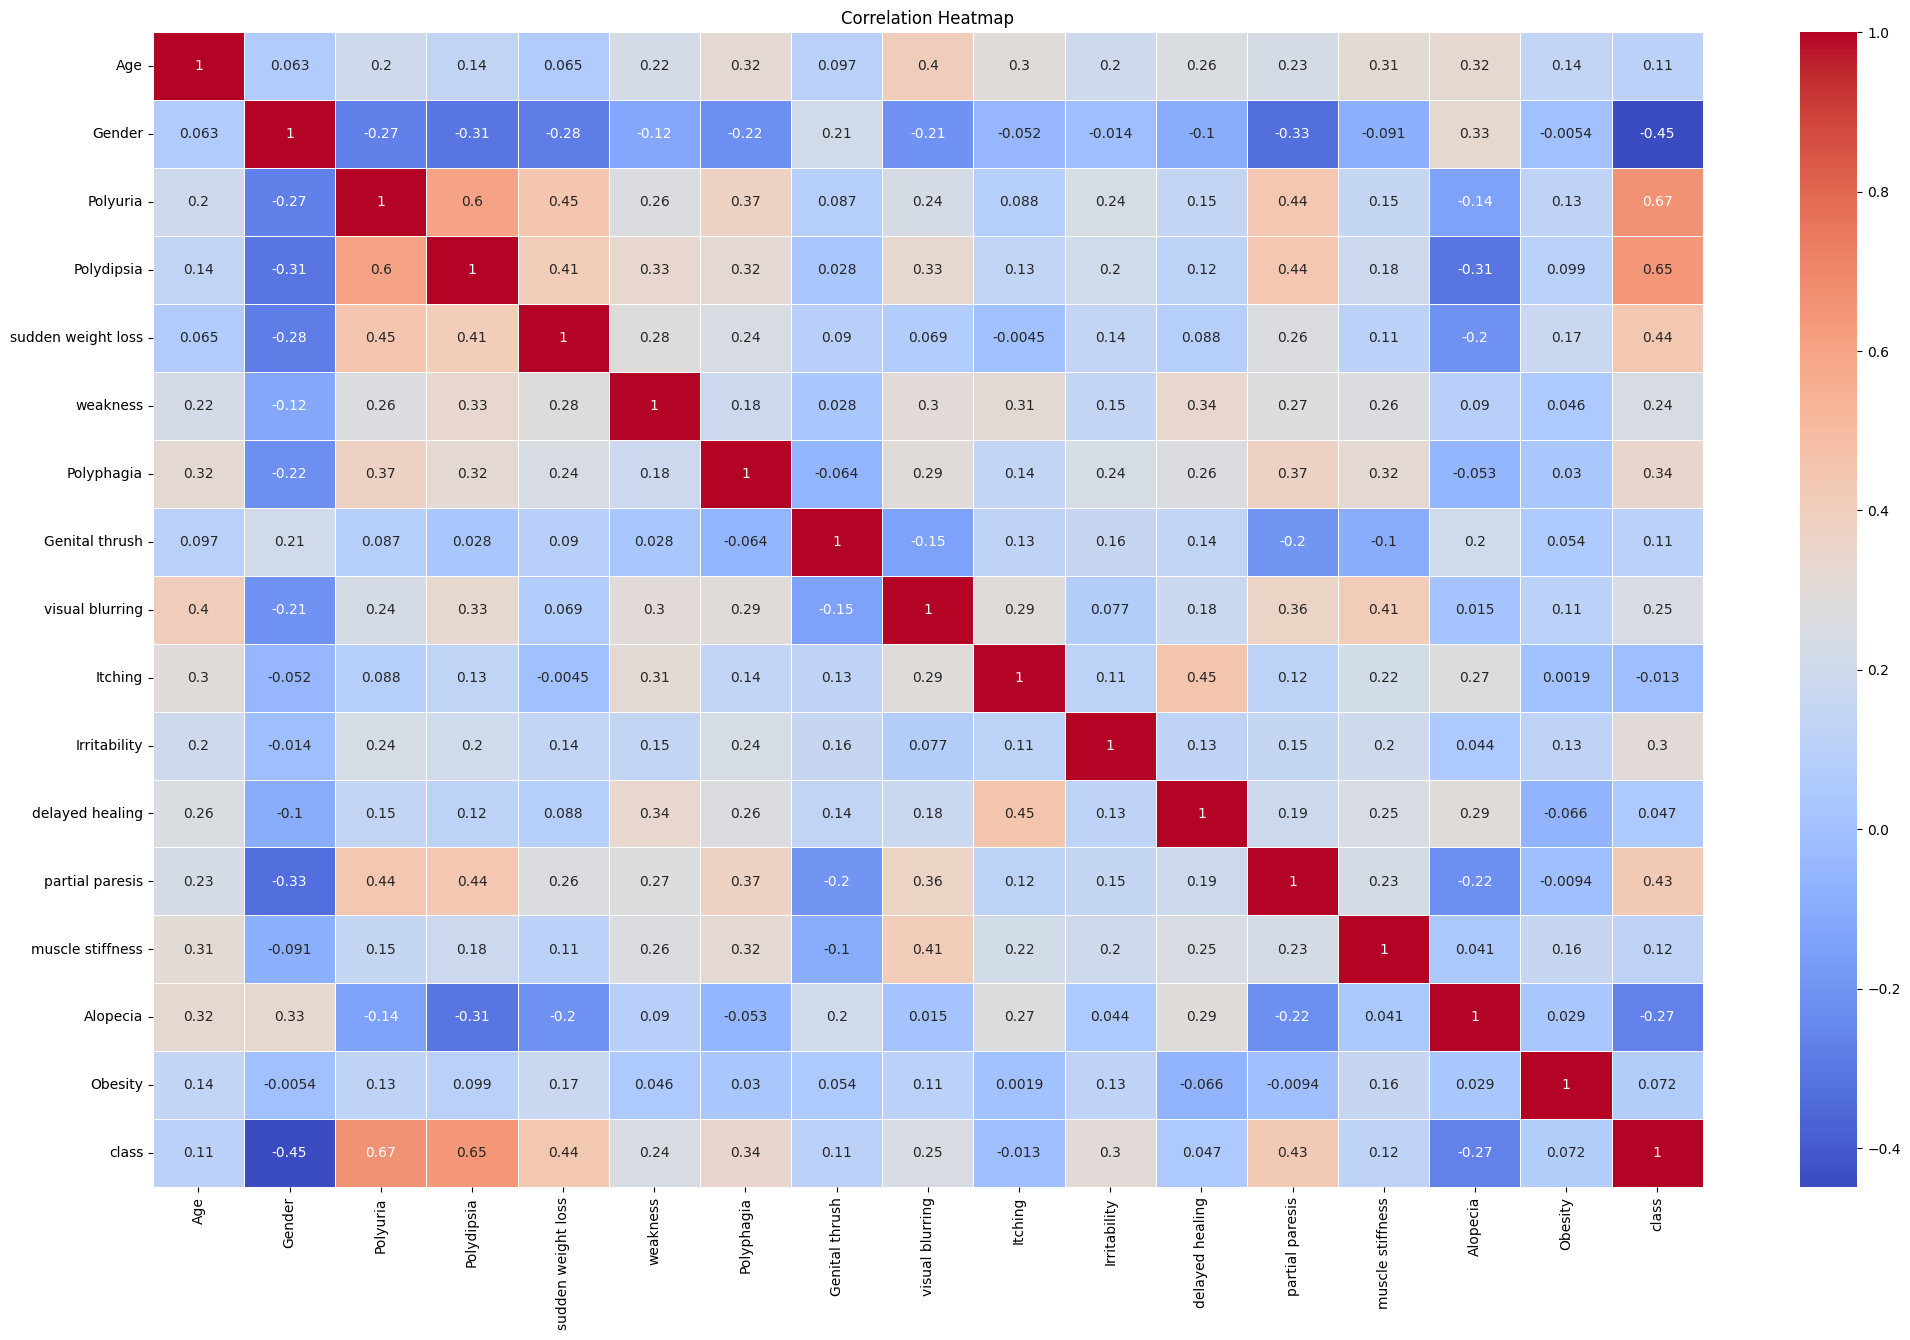

In [ ]:
# Create visualizations
plt.figure(figsize=(25, 15))

# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')



**Strong Positive Correlations (darker red):**
1. Polyuria and Polydipsia (0.6) - These are strongly correlated, which makes clinical sense as they are both related to increased fluid-related symptoms
2. Class has strong correlations with both Polyuria (0.67) and Polydipsia (0.65) - This suggests these symptoms are important diagnostic indicators

**Moderate Positive Correlations:**
1. Age shows positive correlations with visual blurring (0.4) and several other symptoms
2. Delayed healing and itching show a moderate positive correlation (0.45)
3. Partial paresis shows moderate positive correlations with Polyuria and Polydipsia (both 0.44)

**Notable Negative Correlations (blue):**
1. Gender shows several negative correlations, most strongly with:
   - Class (-0.45)
   - Partial paresis (-0.33)
   - Polydipsia (-0.31)


Given the strong relationships between classic symptoms like polyuria (excessive urination) and polydipsia (excessive thirst), along with other common complications like visual blurring and delayed healing.

Text(0.5, 1.0, 'Age Distribution by Class')

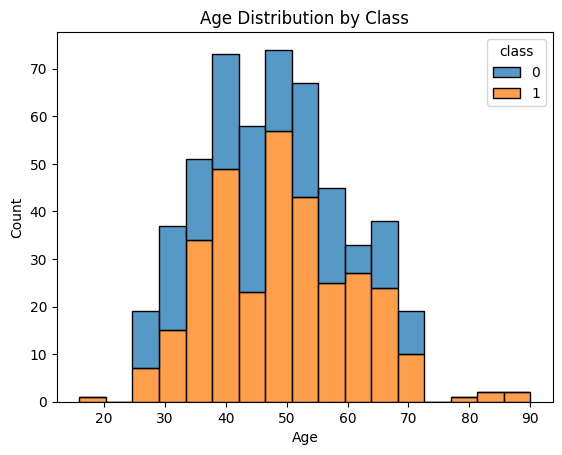

In [ ]:
# Age distribution
sns.histplot(data=df, x='Age', hue='class', multiple="stack")
plt.title('Age Distribution by Class')

This graph shows the age distribution of what appears to be diabetes classification data, where Class 0 (blue)  represents non-diabetic individuals and Class 1 (orange) represents diabetic individuals. Here are the key observations:

1. Age Range
- The dataset covers people from roughly 20 to 90 years old
- The majority of cases (both diabetic and non-diabetic) fall between 35-65 years of age
- There's a clear peak in the 40-50 age range for both classes


2. Peak Differences
- Class 0 peaks around age 40-45
- Class 1 shows a similar peak but with lower counts

This distribution aligns with general medical knowledge that diabetes risk increases with age but is most commonly diagnosed in middle adulthood. The data could be valuable for early diabetes detection, particularly in understanding age-related risk factors.

Text(0.5, 0, 'Gender (0: Female, 1: Male)')

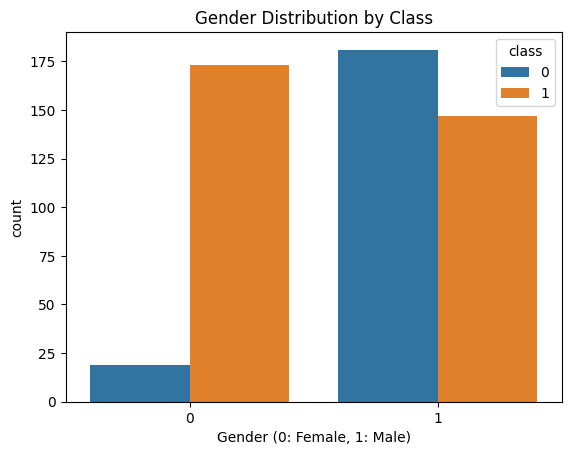

In [ ]:
# Gender distribution
sns.countplot(data=df, x='Gender', hue='class')
plt.title('Gender Distribution by Class')
plt.xlabel('Gender (0: Female, 1: Male)')

From this gender distribution graph, we can observe several key insights:

**1. Gender Representation:**
- The x-axis shows gender coded as 0 (Female) and 1 (Male)
- The colors represent class 0 (non-diabetic) in blue and class 1 (diabetic) in orange

**2. Distribution Analysis:**
- Females (Gender 0):
  * Much higher proportion of diabetic cases (orange) compared to non-diabetic cases (blue)
  * Approximately 175 diabetic cases versus about 20 non-diabetic cases

- Males (Gender 1):
  * More balanced distribution between diabetic and non-diabetic cases
  * Slightly higher number of non-diabetic cases (blue) compared to diabetic cases (orange)
  * Around 180 non-diabetic cases versus 150 diabetic cases


This distribution suggests that gender might be a significant factor in diabetes risk assessment, though it's important to consider potential sampling biases in the dataset before drawing definitive conclusions.

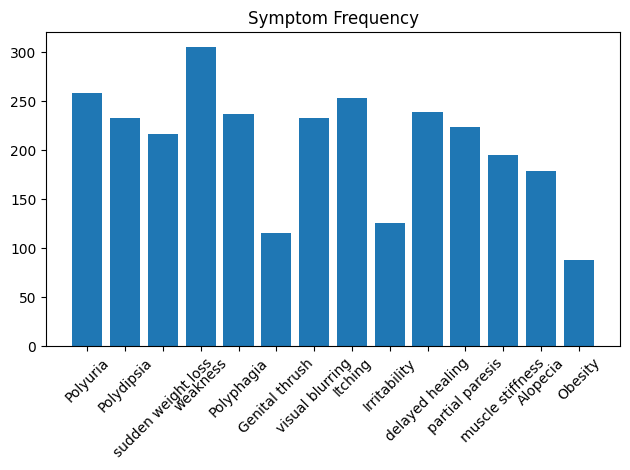

In [ ]:
# Symptom analysis
symptoms = df.drop(['Age', 'Gender', 'class'], axis=1).sum()
plt.bar(range(len(symptoms)), symptoms)
plt.xticks(range(len(symptoms)), symptoms.index, rotation=45)
plt.title('Symptom Frequency')

plt.tight_layout()
plt.show()

**From this symptom frequency graph, we can make several important observations:**

**1. Most Common Symptoms (highest frequency):**
- Weakness is the most frequently reported symptom, with around 300 cases
- Polyuria (excessive urination) follows as the second most common with about 250 cases
- Itching and Polyphagia (increased hunger) also show high frequencies with approximately 250 cases each

**2. Moderately Common Symptoms:**
- Polydipsia (increased thirst)
- Visual blurring
- Delayed healing
- Partial paresis
- Muscle stiffness
All appear in around 200-230 cases

**3. Less Common Symptoms (lowest frequency):**
- Obesity is the least reported symptom with under 100 cases
- Genital thrush appears in about 120 cases
- Alopecia (hair loss) shows relatively lower frequency


This distribution helps identify which symptoms are most common in the dataset and could be particularly important for early diabetes detection. The high frequency of classic diabetes symptoms like polyuria, polydipsia, and weakness aligns with typical clinical presentations of diabetes.

In [ ]:
# Create models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'accuracy': accuracy,
        'report': classification_report(y_test, y_pred)
    }

    # Print results
    print(f"\nResults for {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(results[name]['report'])


Results for Logistic Regression:
Accuracy: 0.9231

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104


Results for Random Forest:
Accuracy: 0.9904

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104


Results for SVM:
Accuracy: 0.9904

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.99      1.00 

Based on these classification results for early diabetes detection, let me break down the performance of each model:

**1. Random Forest and SVM performed the best:**
- Both achieved 99.04% accuracy
- Both showed excellent balance between precision and recall
- Both had nearly perfect f1-scores (0.99) for both classes
- SVM achieved perfect precision (1.00) for Class 0
- Random Forest achieved perfect recall (1.00) for Class 0

**2. Logistic Regression showed good performance:**
- 92.31% overall accuracy
- Better performance on Class 1 (diabetic) with 0.94 f1-score
- Slightly lower performance on Class 0 (non-diabetic) with 0.88 f1-score
- Good balance between precision and recall

**3. K-Nearest Neighbors (KNN) had the lowest performance:**
- 89.42% overall accuracy
- Stronger performance on Class 1 (0.92 f1-score) than Class 0 (0.85 f1-score)
- Shows some imbalance between precision and recall, especially for Class 0



In [ ]:
# Create voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('lr', models['Logistic Regression']),
        ('rf', models['Random Forest']),
        ('svm', models['SVM'])
    ],
    voting='soft'
)

# Train and evaluate
voting_clf.fit(X_train_scaled, y_train)
y_pred_voting = voting_clf.predict(X_test_scaled)

print("\nVoting Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_voting))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_voting))


Voting Classifier Results:
Accuracy: 0.9615384615384616

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        33
           1       0.96      0.99      0.97        71

    accuracy                           0.96       104
   macro avg       0.96      0.95      0.95       104
weighted avg       0.96      0.96      0.96       104



This voting classifier result shows the performance of the ensemble model combining multiple classifiers. Let me break down the results:

1. Overall Performance:
- Achieved 96.15% accuracy, which is very strong
- Shows excellent balanced performance across all metrics
- Falls between the individual model performances (better than KNN and Logistic Regression, slightly lower than RF and SVM)

2. Class-wise Performance:
For Non-diabetic cases (Class 0):
- Precision: 0.97 (97% of predicted non-diabetic cases were correct)
- Recall: 0.91 (91% of actual non-diabetic cases were identified)
- F1-score: 0.94 (strong harmonic mean of precision and recall)

For Diabetic cases (Class 1):
- Precision: 0.96 (96% of predicted diabetic cases were correct)
- Recall: 0.99 (99% of actual diabetic cases were identified)
- F1-score: 0.97 (excellent balance between precision and recall)

3. Benefits of the Voting Classifier:
- Shows very balanced performance between both classes
- Provides robust predictions by combining multiple models
- Reduces the risk of overfitting compared to individual models
- Maintains high accuracy while being more generalizable



The voting classifier provides a robust and reliable model for diabetes prediction, with excellent performance metrics and good balance between classes.

model score on training data: 0.9230769230769231
model score on testing data: 0.9230769230769231


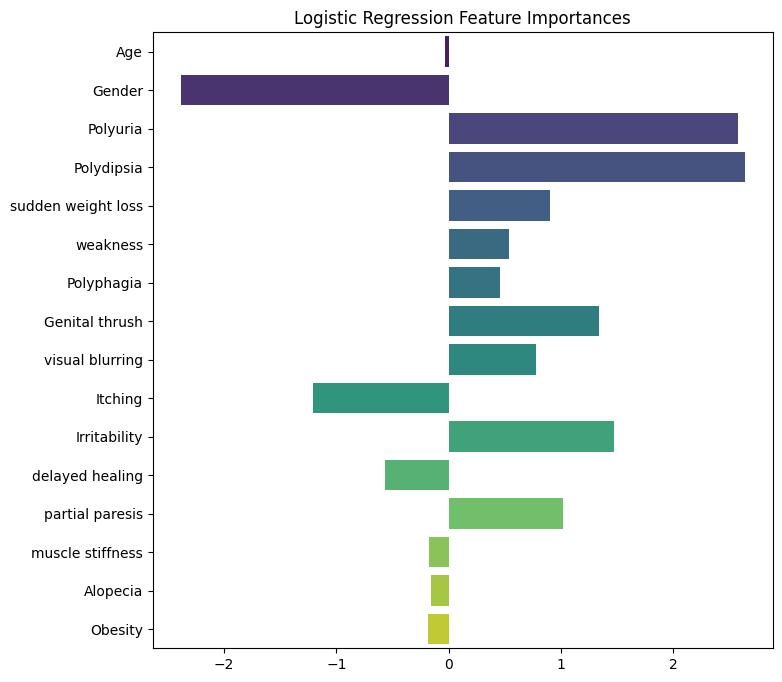

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(f'model score on training data: {lr.score(X_train, y_train)}')
print(f'model score on testing data: {lr.score(X_test, y_test)}')

plt.figure(figsize = (8,8))
sns.barplot(x = lr.coef_[0], y = X_train.columns.tolist(), palette = colors)
plt.title('Logistic Regression Feature Importances');

In [ ]:
rf = RandomForestClassifier(random_state= 10)
rf.fit(X_train,y_train)

rf_pred = rf.predict(X_test)

print (f'model score on training data: {rf.score(X_train, y_train)}')
print (f'model score on testing data: {rf.score(X_test, y_test)}')

model score on training data: 1.0
model score on testing data: 0.9903846153846154


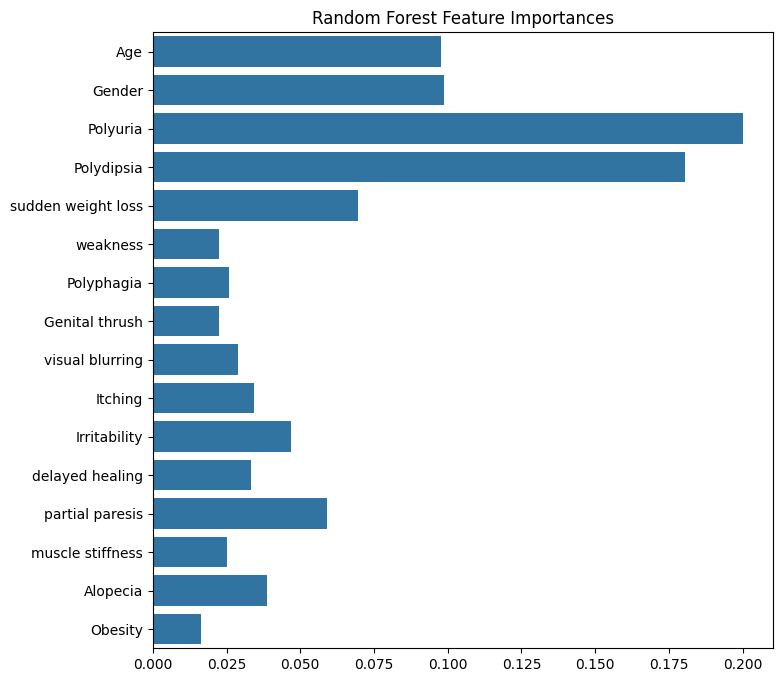

In [ ]:
plt.figure(figsize = (8,8))
sns.barplot(x = rf.feature_importances_, y = X_train.columns.tolist())
plt.title('Random Forest Feature Importances');

In [ ]:
feature_names = df.drop('class', axis = 1)
class_name = df['class']

def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []

    def recurse(node, path, paths):

        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]

    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]

    rules = []
    for path in paths:
        rule = "if "

        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]

    return rules

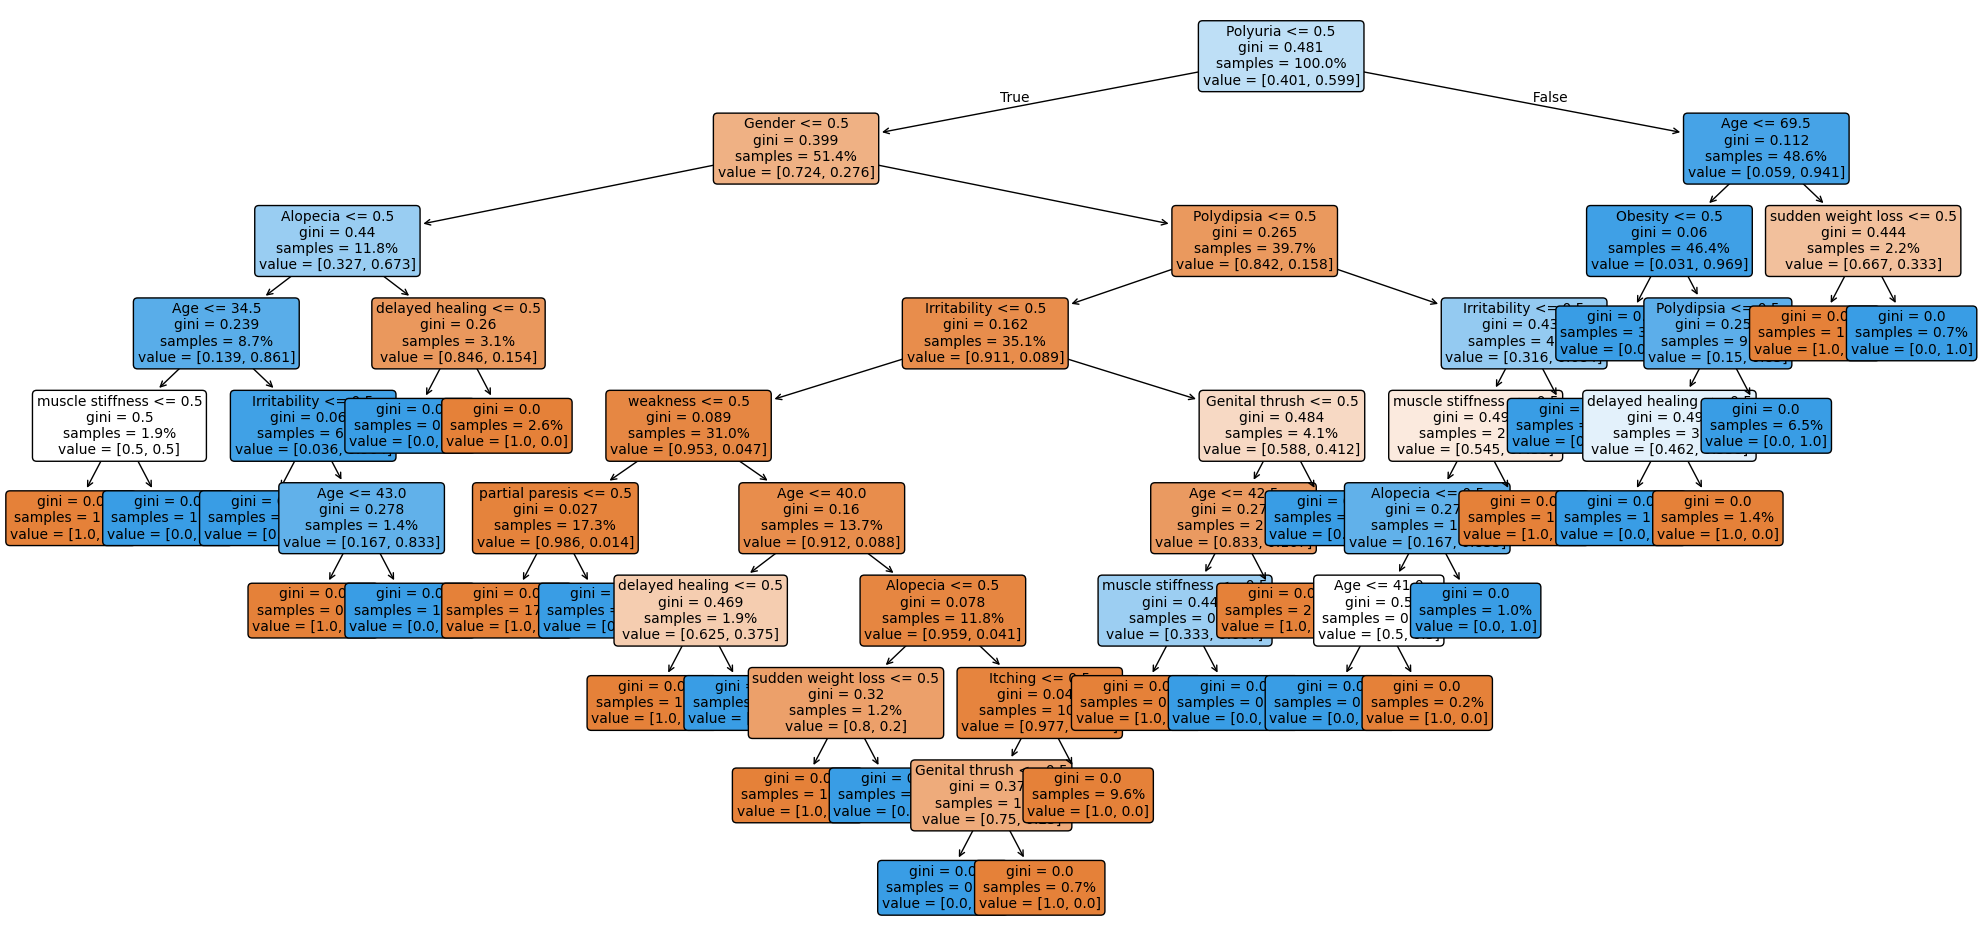

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create and train a DecisionTreeClassifier
dt = DecisionTreeClassifier() # Instantiate the model
dt.fit(X_train, y_train) # Train the model with your training data

# Now you can plot the tree
fig, ax = plt.subplots(figsize=(25,12))
plot_tree(
    decision_tree = dt,  # Now 'dt' is defined and holds the trained model
    feature_names = X_train.columns,
    filled = True,
    rounded = True,
    fontsize=10,
    proportion = True,
    ax=ax,
);

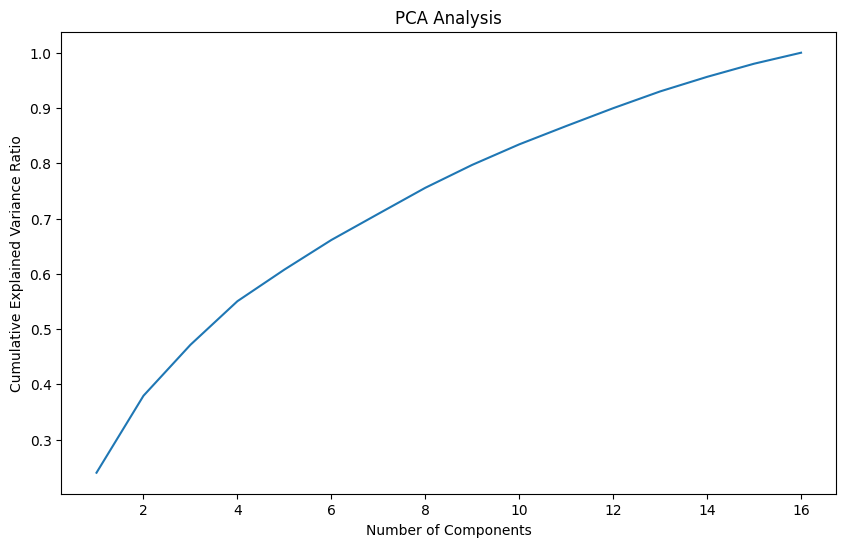

In [ ]:
# PCA Analysis
pca = PCA()
X_pca = pca.fit_transform(X_train_scaled)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Analysis')
plt.show()

From this Principal Component Analysis (PCA) graph, we can observe several key insights:

1. Variance Explanation Pattern:
- The curve shows a steep initial rise, indicating the first few components capture significant variance
- Around 4 components explain approximately 55% of the variance
- Around 8 components explain roughly 75% of the variance
- The curve begins to level off after about 10 components
- All 16 components together explain nearly 100% of the variance

2. Component Analysis:
- No single component or small set of components explains the majority of variance
- The non-linear shape of the curve suggests there is some redundancy in the original features
- We need to retain a fairly large number of components to maintain good predictive power

3. Dimensionality Reduction Implications:
- To retain 80-85% of the information, we would need approximately 10-12 components
- The gradual slope after 8 components suggests diminishing returns from adding more components
- There's no clear "elbow" point in the curve, making it challenging to choose an optimal number of components

This PCA analysis suggests that while some dimensionality reduction is possible, most features contribute meaningful information to the diabetes detection task, which explains the strong performance we saw in the classification models.

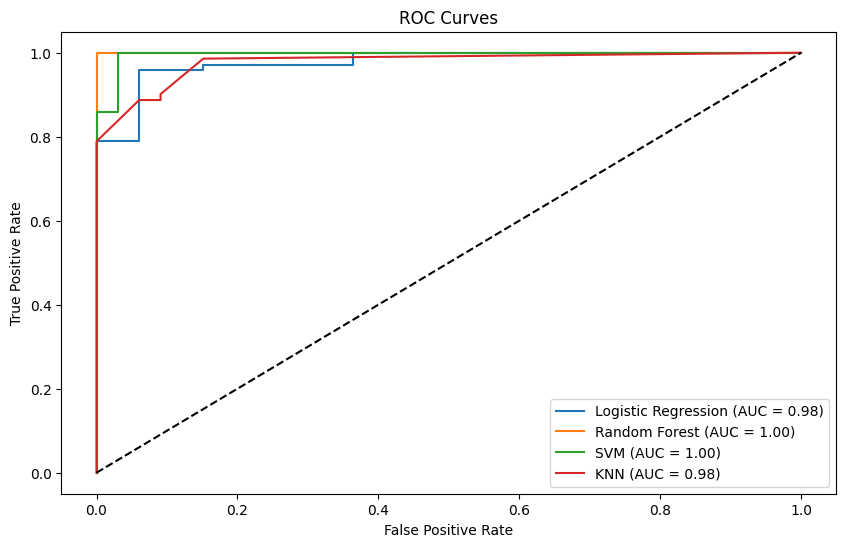

In [ ]:
plt.figure(figsize=(10, 6))
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

This ROC (Receiver Operating Characteristic) curve graph shows the performance comparison of all four classification models used for diabetes detection. Here are the key observations:

1. Overall Performance:
- All models performed exceptionally well, with AUC (Area Under Curve) scores ranging from 0.98 to 1.00
- Random Forest and SVM achieved perfect AUC scores of 1.00
- Logistic Regression and KNN both achieved very high AUC scores of 0.98

2. Model Comparison:
- Random Forest (orange) and SVM (green) show nearly identical performance with perfect classification
- Logistic Regression (blue) and KNN (red) show very similar performance to each other
- The difference between the best and worst performing models is minimal (0.02 AUC difference)

3. Curve Characteristics:
- All curves rise very steeply at low false positive rates, indicating excellent sensitivity
- The curves quickly reach and maintain high true positive rates
- All models significantly outperform random classification (shown by the dotted diagonal line)
- The curves are well above the diagonal random line, showing strong predictive power

4. Clinical Implications:
- The high AUC scores suggest these models would be very reliable for early diabetes detection
- The models can achieve high true positive rates with very low false positive rates
- This performance indicates the selected features are highly predictive of diabetes

This visualization confirms the earlier classification metrics we saw, showing that all models, particularly Random Forest and SVM, are excellent choices for this diabetes detection task.

In [ ]:
def predict_diabetes_risk(patient_data):
    """
    Make prediction using the voting classifier and individual models
    """
    try:
        # Convert input to DataFrame
        patient_df = pd.DataFrame([patient_data])

        # Scale the features
        patient_scaled = scaler.transform(patient_df)

        # Make predictions using voting classifier
        prediction = voting_clf.predict(patient_scaled)[0]
        probabilities = voting_clf.predict_proba(patient_scaled)[0]

        # Create result dictionary
        result = {
            'prediction': 'Positive' if prediction == 1 else 'Negative',
            'probability': float(probabilities[1])
        }

        return result

    except Exception as e:
        return {'error': str(e)}

def create_prediction_interface():
    # Create widgets for inputs
    age_widget = widgets.IntText(description='Age:', min=0, max=120)
    gender_widget = widgets.Dropdown(
        options=[('Male', 1), ('Female', 0)],
        description='Gender:'
    )

    # Create widgets for symptoms
    symptoms = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
               'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
               'Irritability', 'delayed healing', 'partial paresis',
               'muscle stiffness', 'Alopecia', 'Obesity']

    symptom_widgets = {}
    for symptom in symptoms:
        symptom_widgets[symptom] = widgets.Dropdown(
            options=[('Yes', 1), ('No', 0)],
            description=symptom + ':',
            layout=widgets.Layout(width='50%')
        )

    output = widgets.Output()
    predict_button = widgets.Button(
        description='Predict',
        button_style='info',
        layout=widgets.Layout(width='200px')
    )

    def on_predict_button_clicked(b):
        with output:
            output.clear_output()

            # Validate inputs
            if age_widget.value is None:
                print("Please enter age")
                return

            # Collect input data
            patient_data = {
                'Age': age_widget.value,
                'Gender': gender_widget.value
            }

            # Add symptoms to patient data
            for symptom, widget in symptom_widgets.items():
                patient_data[symptom] = widget.value

            try:
                result = predict_diabetes_risk(patient_data)

                if 'error' in result:
                    print(f"Error: {result['error']}")
                    return

                print("\nPrediction Results:")
                print(f"Diagnosis: {result['prediction']}")
                print(f"Probability: {result['probability']*100:.2f}%")

                risk_level = "High" if result['probability'] > 0.5 else "Low"
                risk_color = "red" if result['probability'] > 0.5 else "green"
                display(HTML(
                    f'<div style="color: {risk_color}; font-weight: bold;">'
                    f'Risk Level: {risk_level}</div>'
                ))

            except Exception as e:
                print(f"Error in prediction: {str(e)}")

    # Attach the click handler
    predict_button.on_click(on_predict_button_clicked)

    # Create main layout
    main_container = widgets.VBox([
        widgets.HTML("<h2 style='color: #fff;'>Diabetes Risk Prediction System</h2>"),
        widgets.VBox([
            widgets.HTML("<h3>Patient Information</h3>"),
            age_widget,
            gender_widget
        ]),
        widgets.VBox([
            widgets.HTML("<h3>Symptoms</h3>"),
            *[widgets.HBox([w]) for w in symptom_widgets.values()]
        ]),
        predict_button,
        output
    ], layout=widgets.Layout(padding='20px'))

    display(main_container)

# Make sure the models are trained and the voting classifier is created before running this
try:
    # Create and display the interface
    create_prediction_interface()
except Exception as e:
    print(f"Error initializing interface: {str(e)}")